# Регрессия - пора творить!

Если вы дошли до этой практики и выполнили все предыдущие - вау! Аплодисменты вам!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/leo.png" width=500/></p>



Тем не менее, не время расслабляться! На этот раз мы не будем рассказывать вам новый материал - лишь дадим пару напутствий и пожелаем успехов и сил!

В этот раз вам предлагается разработать модель предсказания цены домов по набору данных Boston Houses Pricing. Мы его уже немного пощупали в прошлой практике, но в этой вам предстоит сделать всё самостоятельно и на полных данных!

Что надо будет сделать:
- загрузить данные;
- посмотреть и размер, и примеры данных;
- проверить количество пропусков в данных;
    - убедиться, что пропусков в данных нет и можно строить **baseline**;
- разделить данные на train и test;
    - Делаем это один раз! Все дальнейшие модификации и улучшения должны делаться на основе единственного разделения!
    - И не забудьте зафиксировать сид! Переменную `RANDOM_SEED` мы даём ниже;
- создать baseline модель, получить метрики на тестовой выборке;
- проанализировать данные, подготовить план по очистке и предобработке данных;
- создать функцию очистки;
- произвести очистку train и test выборок -> обучаем модель с очищенными данными;
    - Снимаем метрики и так мы оцениваем влияние очистки данных на обучение;
- создать класс предобработки данных;
- сделать предобработку очищенных данных -> обучаем модель;
    - Снимаем метрики и так мы оцениваем влияние предобработки данных на обучение;

А дальше можете пофантазировать, почитать интернет и посмотреть, как улучшить метрики! 

**Ваша цель - достигнуть наилучших показателей!**

Вот вам пара идей по интересной организации предобработке:
- по признаку `CRIM` создать признак `is_CRIM`, который будет равен 1, если `CRIM` не равен 0 и 0, если `CRIM` равен нулю;
- сделать обучение модели [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), посмотреть, какие признаки имеют веса близкие к 0 и убрать их из обучения как незначимые;
- оставить только признаки с высокой корреляцией с целевой переменной;
- посмотреть, какие переменные коррелирцют между собой и оставить только единственные из пар коррелирующих;
- посмотреть, в каких примерах данных модель ошибается сильнее всего (отсортировать записи из теста по величине ошибки) и проанализировать, есть ли какая-то зависимость или шум;
- комбинировать разные подходы в зависимости от того, помогает это предсказаниям или нет.

Ещё большим плюсом будет, если вы покажете, как влияет каждый этап предобработки на результаты обучения!

Что мы ждем от вас? 

Готовый ноутбук с таким же названием, в котором будут обязательные пункты с выводами по анализу данных и анализу поведения модели, а также дополнительные пункты с вашими мыслями и результатами улучшения модели.

Успехов вам, мы в вас верим, вы точно справитесь!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/cat-computer-peek-out-36960208.jpg" width=600/></p>

In [89]:
# Зафиксируем состояние случайных чисел
import numpy as np
import random
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [90]:
file_path = "../../boston.csv"
df_src = pd.read_csv(file_path)
df_src.shape

(506, 14)

In [91]:
df_src.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [92]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [93]:
df_src.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Создадим класс для обучения моделей и оценки показателей.

In [94]:
from sklearn.linear_model import LinearRegression
from typing import Dict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

class EvaluateRegressionModel:
    def __init__(self, df: pd.DataFrame, target: str, reg_model: LinearRegression) -> None:
        self._df = df.copy()
        self._df_train_data, self._df_test_data = train_test_split(
            self._df, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
        )
        self._df_x = self._df_train_data.copy()
        self._y_true = self._df_x.pop(target)
        self._df_test_x = self._df_test_data.copy()
        self._y_test_true = self._df_test_x.pop(target)

        self.reg_model = reg_model
        self.reg_model.fit(self._df_x, self._y_true)
        self._y_test_pred = self.reg_model.predict(self._df_test_x)

        self.result = self._evaluate_metrics()

    def _evaluate_metrics(self) -> Dict[str, float]:
        return{
            "r2": r2_score(self._y_test_true, self._y_test_pred),
            "mae": mean_absolute_error(self._y_test_true, self._y_test_pred),
            "rmse": np.sqrt(mean_squared_error(self._y_test_true, self._y_test_pred)),
        }


Создадим baseline модель и оценим MAE и R2.

In [95]:
baseline_model = EvaluateRegressionModel(
    df=df_src,
    target="MEDV",
    reg_model=LinearRegression(),
)
print("Baseline:")
print(baseline_model.result)

Baseline:
{'r2': 0.711226005748488, 'mae': 3.1627098714574418, 'rmse': 4.638689926172863}


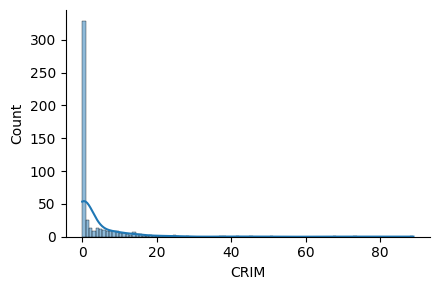

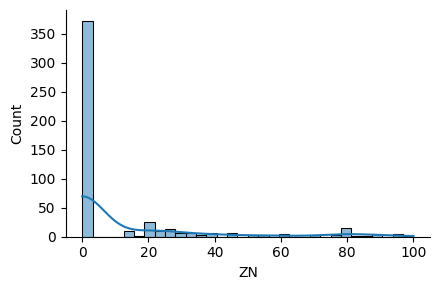

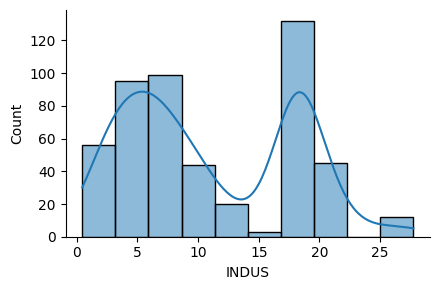

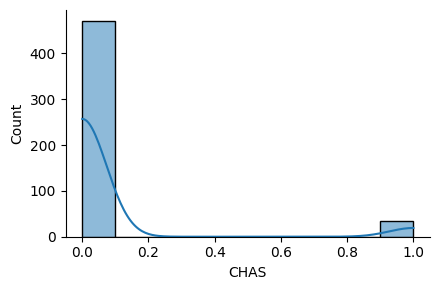

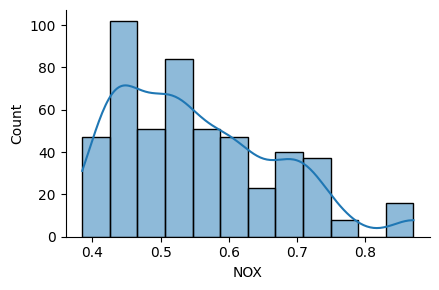

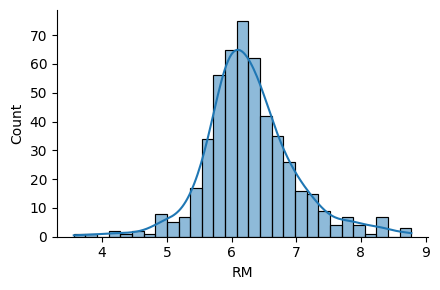

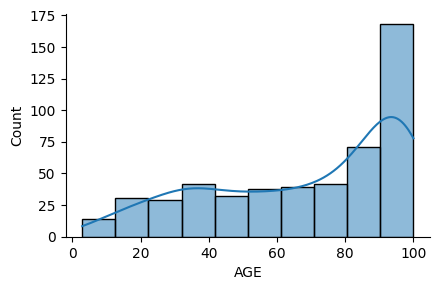

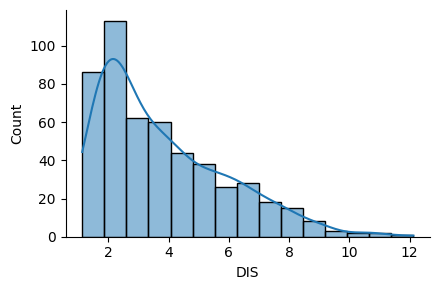

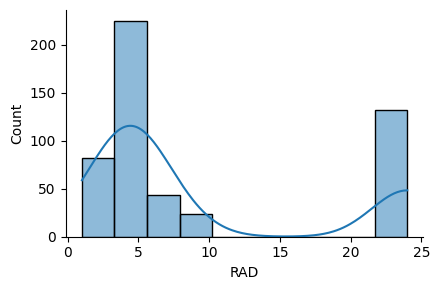

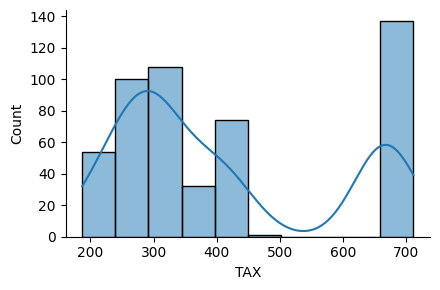

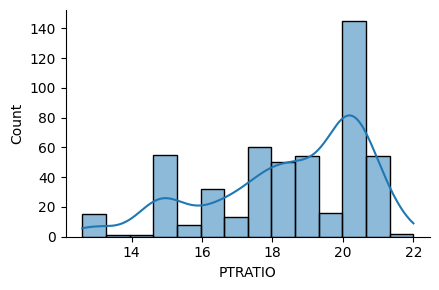

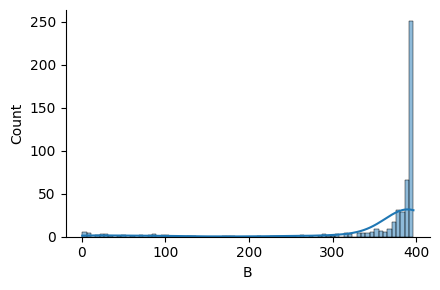

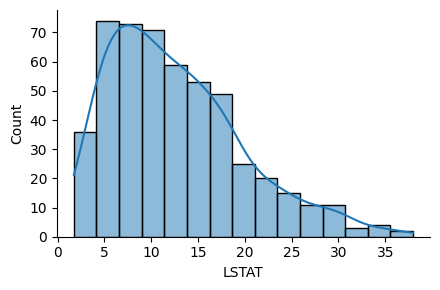

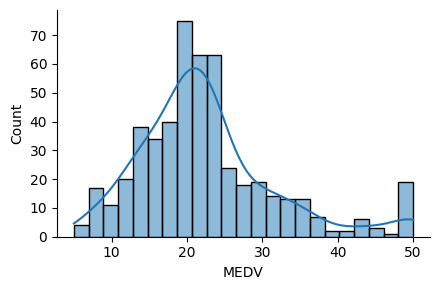

In [96]:
for column in df_src.columns:
    sns.displot(df_src[column], kde=True, height=3, aspect=1.5)
    plt.show()

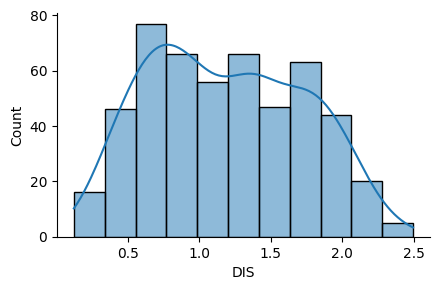

In [97]:
sns.displot(np.log(df_src["DIS"]), kde=True, height=3, aspect=1.5)
plt.show()

Оценим абсолютное значение корреляции всех признаков по Пирсону и Спирману.

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
Name: MEDV, dtype: float64


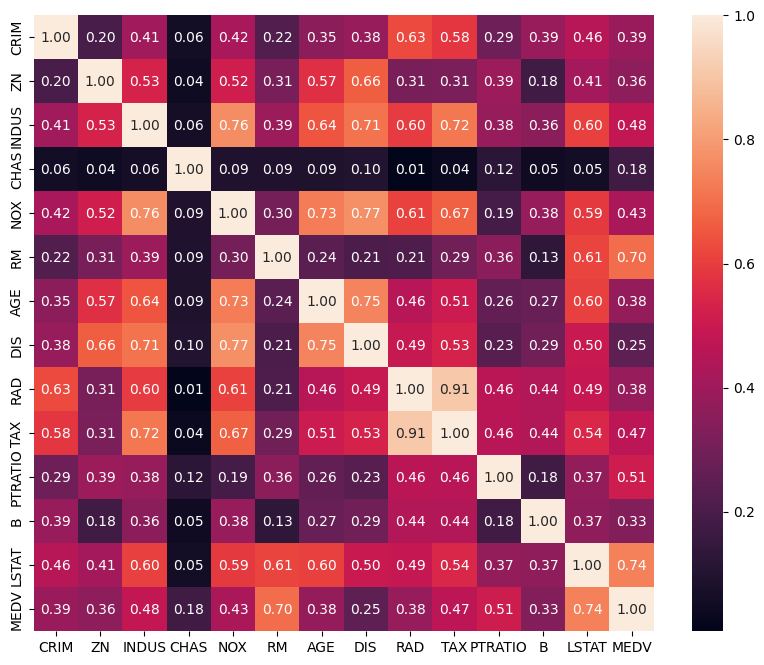

In [98]:
correlation_mtrx = abs(df_src.corr())
print(correlation_mtrx["MEDV"].sort_values(ascending=False)[1:6]) # пять наиболее коррелирующих признаков с целевым
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mtrx, annot=True, fmt=".2f")
plt.show()

LSTAT      0.852914
RM         0.633576
INDUS      0.578255
NOX        0.562609
TAX        0.562411
CRIM       0.558891
PTRATIO    0.555905
AGE        0.547562
Name: MEDV, dtype: float64
['LSTAT', 'RM', 'INDUS', 'NOX', 'TAX', 'CRIM', 'PTRATIO', 'AGE']


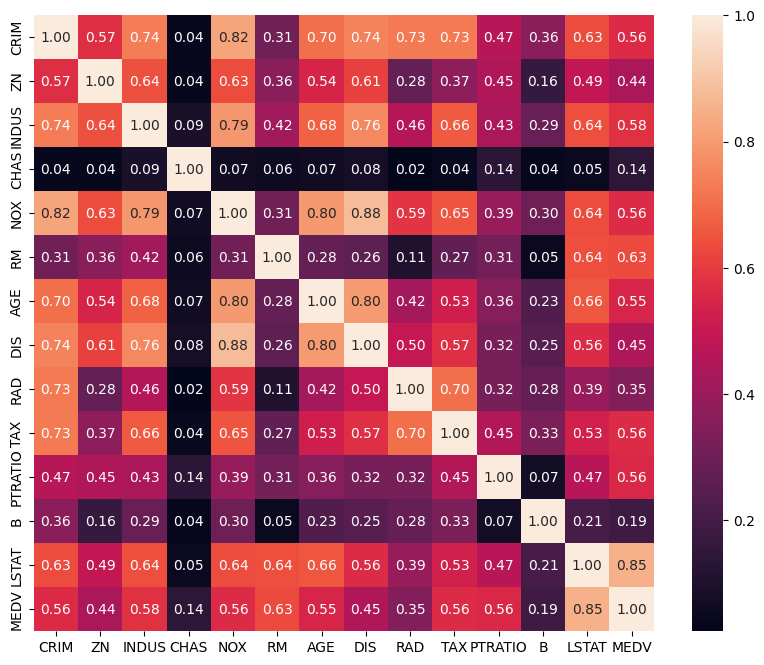

In [99]:
correlation_mtrx = abs(df_src.corr(method="spearman"))
top_corr = correlation_mtrx["MEDV"].sort_values(ascending=False)[1:9]  # 8 наиболее коррелирующих признаков с целевым
print(top_corr) 
print(top_corr.index.to_list())
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mtrx, annot=True, fmt=".2f")
plt.show()

prev_top_corr = top_corr

Сделаем предположение о том, что точность прогноза увеличится если обучить модель на выборке, которая содержит параметры корреляция которых с целевым параметром > 0.50.

In [100]:
features = top_corr.index.to_list() + ["MEDV"]

model = EvaluateRegressionModel(
    df=df_src[features],
    target="MEDV",
    reg_model=LinearRegression(),
)
print("Baseline:")
print(baseline_model.result)
print("Стало:")
print(model.result)

Baseline:
{'r2': 0.711226005748488, 'mae': 3.1627098714574418, 'rmse': 4.638689926172863}
Стало:
{'r2': 0.6519684814375621, 'mae': 3.5560603796895114, 'rmse': 5.092436136396098}


Стало хуже :/
Будем использовать все переменные.
Попробуем очистить данные. Для этого выведем зависимость всех данных от целевой метрики и попробуем найти аномалии. 

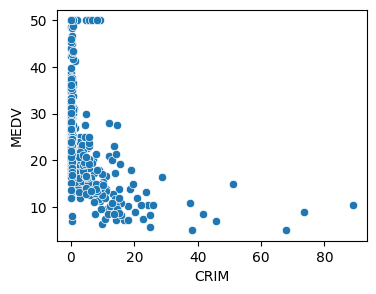

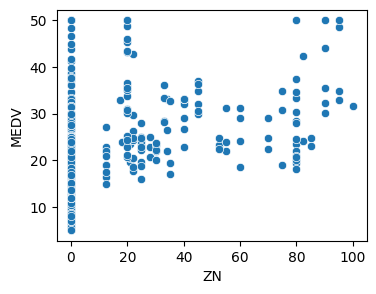

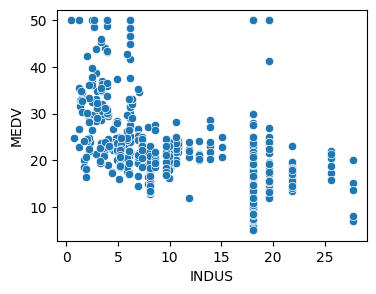

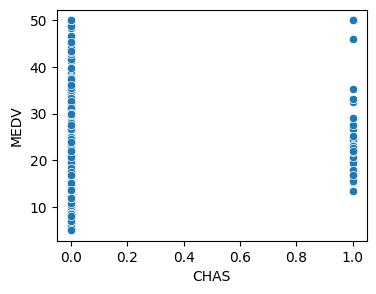

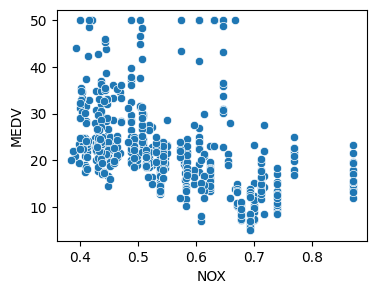

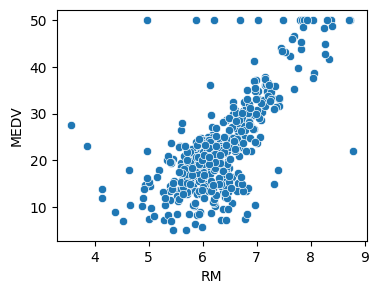

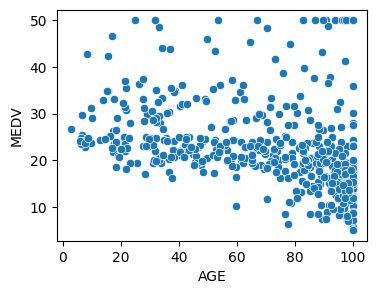

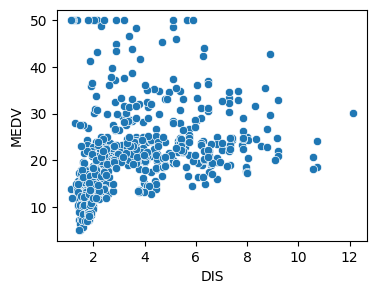

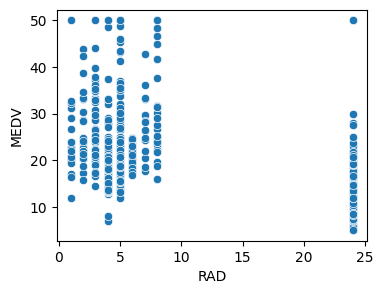

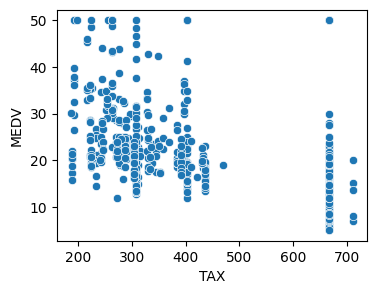

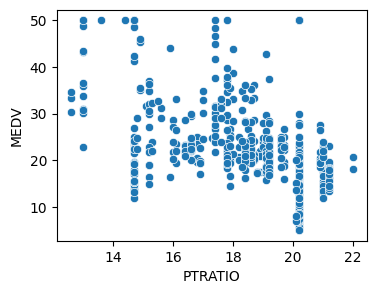

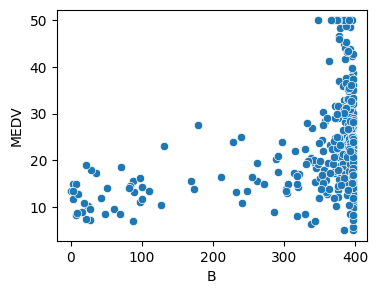

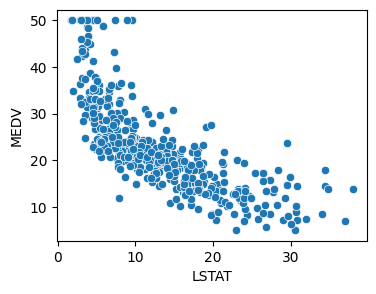

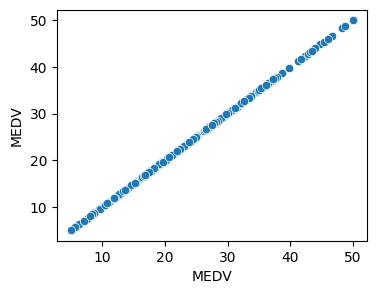

In [101]:
for feature in df_src.columns:
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=feature, y="MEDV", data=df_src)
    plt.show()

По графику RM-MEDV отчетливо видно выбросы. Попробуем их убрать. Заодно уберем цензурированные данные.

In [102]:
outliers_mask_1 = df_src["MEDV"] >= 50
outliers_mask_2 = df_src["RM"] < 4
outliers_mask_3 = (df_src["RM"] > 8) & (df_src["MEDV"] < 30)
outliers_mask_4 = df_src["TAX"] == 666

outliers_mask = outliers_mask_1 | outliers_mask_2 | outliers_mask_3 | outliers_mask_4

df_cleaned = df_src.loc[~outliers_mask]


In [103]:
correlation_mtrx = abs(df_cleaned.corr(method="spearman"))
top_corr = correlation_mtrx["MEDV"].sort_values(ascending=False)[1:9]  # 8 наиболее коррелирующих признаков с целевым
print("Было:")
print(prev_top_corr)
print(prev_top_corr.mean())
print("Стало:")
print(top_corr) 
print(top_corr.mean())

Было:
LSTAT      0.852914
RM         0.633576
INDUS      0.578255
NOX        0.562609
TAX        0.562411
CRIM       0.558891
PTRATIO    0.555905
AGE        0.547562
Name: MEDV, dtype: float64
0.6065153406073016
Стало:
RM         0.808846
LSTAT      0.796247
INDUS      0.542916
AGE        0.466195
NOX        0.424915
PTRATIO    0.408801
TAX        0.399835
ZN         0.394616
Name: MEDV, dtype: float64
0.5302963961470631


После очистки данных корреляция увеличилась. Взглянем на графики.

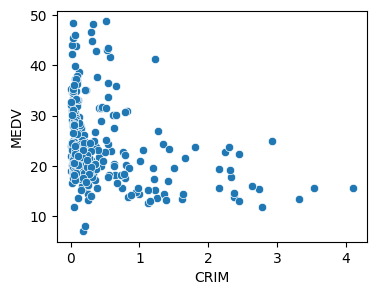

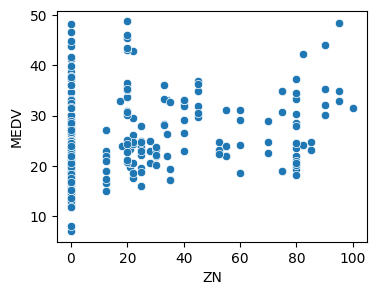

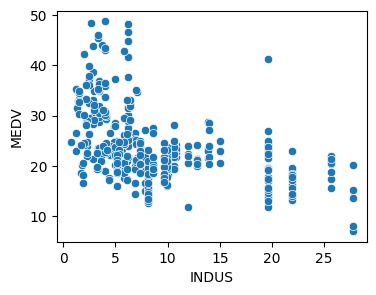

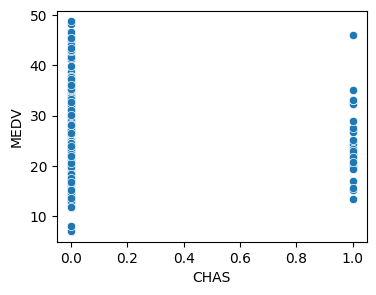

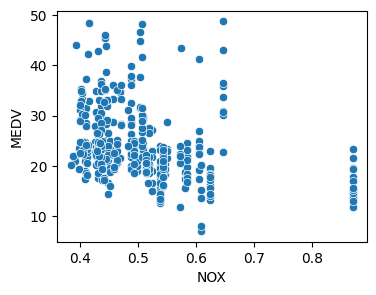

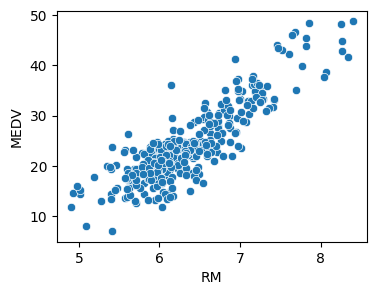

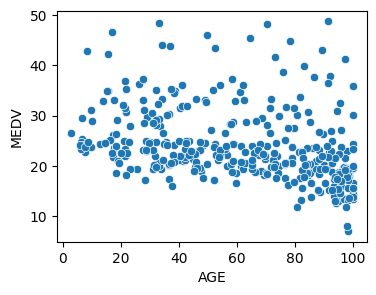

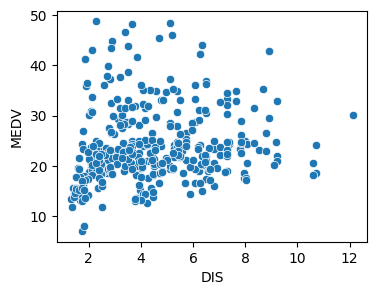

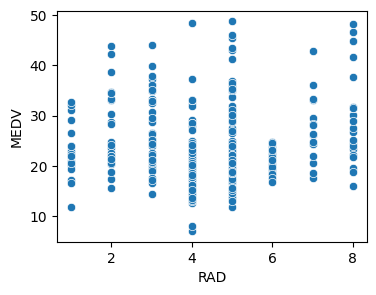

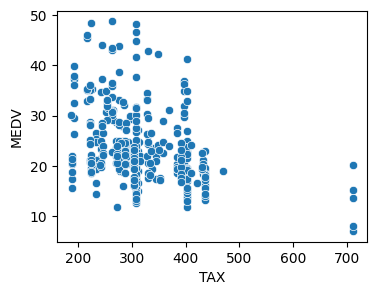

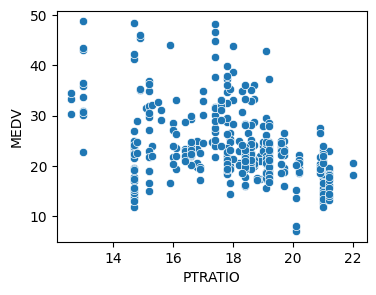

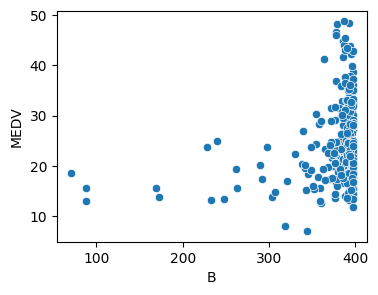

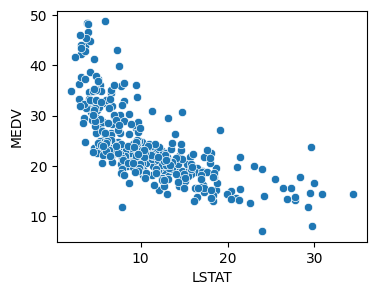

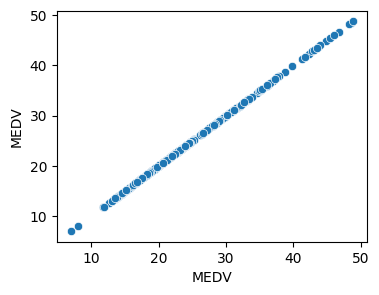

In [104]:
for feature in df_cleaned.columns:
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=feature, y="MEDV", data=df_cleaned)
    plt.show()

Попробуем построить обучить модель на очищенных данных и оценить параметры качества.

In [105]:
model_2 = EvaluateRegressionModel(
    df=df_cleaned,
    target="MEDV",
    reg_model=LinearRegression(),
)
print("Baseline:")
print(baseline_model.result)
print("Предыдущий результат:")
print(model.result)
print("Стало:")
print(model_2.result)


Baseline:
{'r2': 0.711226005748488, 'mae': 3.1627098714574418, 'rmse': 4.638689926172863}
Предыдущий результат:
{'r2': 0.6519684814375621, 'mae': 3.5560603796895114, 'rmse': 5.092436136396098}
Стало:
{'r2': 0.8361783876321004, 'mae': 2.1275073491982424, 'rmse': 2.823688308074896}


Отлично! R2 - увеличилась, MAE и RMSE - уменьшилась, мы на верном пути :)

Следующим шагом попробуем реализовать класс для подготовки данных

In [106]:
from sklearn.preprocessing import MinMaxScaler

class DataPreprocessing:  # noqa: F811
    def __init__(self):
        self._scaler = MinMaxScaler()
        self._dis_log = None
        self._lstat_poly = None

    def fit(self, df: pd.DataFrame) -> None:
        df_copy = df.copy()
        self._dis_log = np.log(df_copy["DIS"])
        self._lstat_poly = df_copy["LSTAT"] ** 2
        
        df_copy["DIS_log"] = self._dis_log
        df_copy = df_copy.drop("DIS", axis=1)
        
        df_copy["LSTAT_poly_2"] = self._lstat_poly
        self._scaler.fit(df_copy)

    def transform(self, df: pd.DataFrame) -> pd.DataFrame:
        df["DIS_log"] = self._dis_log
        df = df.drop("DIS", axis=1)
        df["LSTAT_poly_2"] = self._lstat_poly
        scaled = self._scaler.transform(df)
        return pd.DataFrame(scaled, columns=df.columns, index=df.index)

Обучим модель

In [107]:
preprocessing = DataPreprocessing()
df_cleaned_copy = df_cleaned.copy()
preprocessing.fit(df_cleaned_copy)
preprocessed_data = preprocessing.transform(df_cleaned_copy)

model_3 = EvaluateRegressionModel(
    df=preprocessed_data,
    target="MEDV",
    reg_model=LinearRegression(),
)
print("Baseline:")
print(baseline_model.result)
print("Предыдущий результат:")
print(model_2.result)
print("Стало:")
print(model_3.result)

Baseline:
{'r2': 0.711226005748488, 'mae': 3.1627098714574418, 'rmse': 4.638689926172863}
Предыдущий результат:
{'r2': 0.8361783876321004, 'mae': 2.1275073491982424, 'rmse': 2.823688308074896}
Стало:
{'r2': 0.8546940345000932, 'mae': 0.04724952964216923, 'rmse': 0.0636204296961809}


Здорово, результаты снова улучшились!

In [108]:
df_cleaned.loc[df_cleaned["CRIM"]==0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


Случаев отсутствия криминала не обнаружено :) А значит приведение к бимодальному распределению не даст результата.

In [109]:
from sklearn.linear_model import Lasso


df_cleaned_copy = df_cleaned.copy()

lasso_model = EvaluateRegressionModel(
    df=df_cleaned_copy,
    target="MEDV",
    reg_model=Lasso(alpha=0.1),
)
print("Baseline:")
print(baseline_model.result)
print("Предыдущий результат:")
print(model_3.result)
print("Стало:")
print(lasso_model.result)

weights = lasso_model.reg_model.coef_
print(weights)
zero_weights = np.where(np.abs(weights) < 1e-5)[0]
zero_weights = [df_cleaned_copy.columns[i] for i in zero_weights]
print(zero_weights)
df_reduced = df_cleaned_copy.drop(columns=zero_weights, axis=1)
df_reduced.head()

Baseline:
{'r2': 0.711226005748488, 'mae': 3.1627098714574418, 'rmse': 4.638689926172863}
Предыдущий результат:
{'r2': 0.8546940345000932, 'mae': 0.04724952964216923, 'rmse': 0.0636204296961809}
Стало:
{'r2': 0.8394715625449537, 'mae': 2.091977581558919, 'rmse': 2.7951630508054746}
[-0.          0.02796705 -0.05814446  0.         -0.          8.03934044
 -0.05643397 -0.93169227  0.24636193 -0.01206242 -0.41099592  0.01514302
 -0.03609971]
['CRIM', 'CHAS', 'NOX']


,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,2.31,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.0,7.07,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.0,7.07,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.0,2.18,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.0,2.18,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [110]:
lasso_model_1 = EvaluateRegressionModel(
    df=df_reduced,
    target="MEDV",
    reg_model=Lasso(alpha=0.1),
)
print("Baseline:")
print(baseline_model.result)
print("Предыдущий результат:")
print(lasso_model.result)
print("Стало:")
print(lasso_model_1.result)
print("Лучший результат:")
print(model_3.result)

print("Веса lasso модели:")
lasso_model_1.reg_model.coef_

Baseline:
{'r2': 0.711226005748488, 'mae': 3.1627098714574418, 'rmse': 4.638689926172863}
Предыдущий результат:
{'r2': 0.8394715625449537, 'mae': 2.091977581558919, 'rmse': 2.7951630508054746}
Стало:
{'r2': 0.8394704557431473, 'mae': 2.091981439843207, 'rmse': 2.79517268674983}
Лучший результат:
{'r2': 0.8546940345000932, 'mae': 0.04724952964216923, 'rmse': 0.0636204296961809}
Веса lasso модели:


array([ 0.02796855, -0.05815305,  8.03929731, -0.05643377, -0.93171674,
        0.24636157, -0.01206223, -0.41098943,  0.01514285, -0.03610067])

Как оказалось изъятие из данных параметров с нулевыми весами ни привело к результату.

Больше идей для улучшения модели и данных нет, поэтому на этом остановимся.